In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

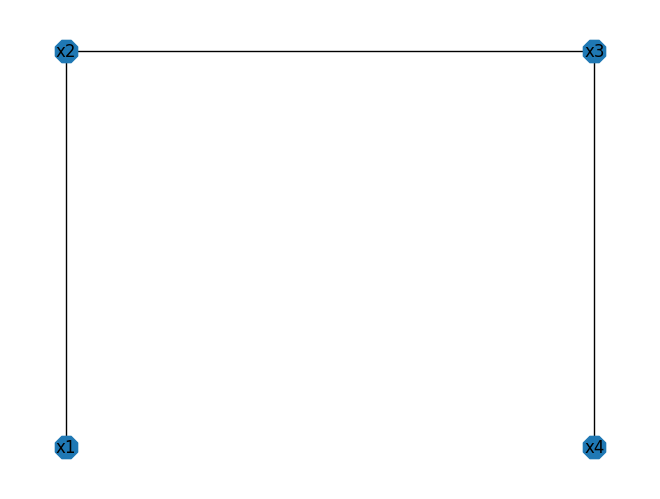

In [4]:
G2 = nx.Graph()
G2.add_edges_from([('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4')])
pos = {'x1': (0, 0), 'x2': (0, 1), 'x3': (1, 1), 'x4': (1, 0)}
nx.draw(G2 ,pos = pos , with_labels =True ,node_shape='8')
plt.show()


In [5]:
D_Matrix = nx.floyd_warshall_numpy(G2)
D_Matrix

array([[0., 1., 2., 3.],
       [1., 0., 1., 2.],
       [2., 1., 0., 1.],
       [3., 2., 1., 0.]])

In [6]:
def Get_C0(D, diam):
    c = np.zeros([len(D), len(D)])
    for i in range(len(D)):
        for j in range(len(D)):
            c[i][j] = diam + 1 - D[i][j]
            c[i][i] = np.inf
    return c

In [9]:
def saha(D ):
    diamater = np.max(D)
    C0 = Get_C0(D, diamater)
    # print(C0)
    vertex_index = 0
    labels = [(vertex_index, 0)]
    for row in range(len(D) - 1):
        index_of_min_val_in_row = np.argmin(C0[vertex_index]) # vertex a that has the minimum number of colors 
        minmum_element = min(C0[vertex_index])
        new_row = []
        for i in range(len(D)):
            C0[index_of_min_val_in_row][i] = C0[index_of_min_val_in_row][i] + minmum_element
            new_row.append(max(C0[index_of_min_val_in_row][i], C0[vertex_index][i] ))
        C0[index_of_min_val_in_row] = new_row

        labels.append((index_of_min_val_in_row, int(minmum_element)))
        vertex_index = index_of_min_val_in_row
    return labels

In [10]:
names = [ "x1","x2","x3","x4"]
labels  = saha(D_Matrix )
sorted_tuples = sorted(labels, key=lambda x: x[0])

labels = {}
for i in range(len(sorted_tuples)):
    labels[names[i]]=sorted_tuples[i][1]
    
print(labels)

{'x1': 0, 'x2': 3, 'x3': 6, 'x4': 1}


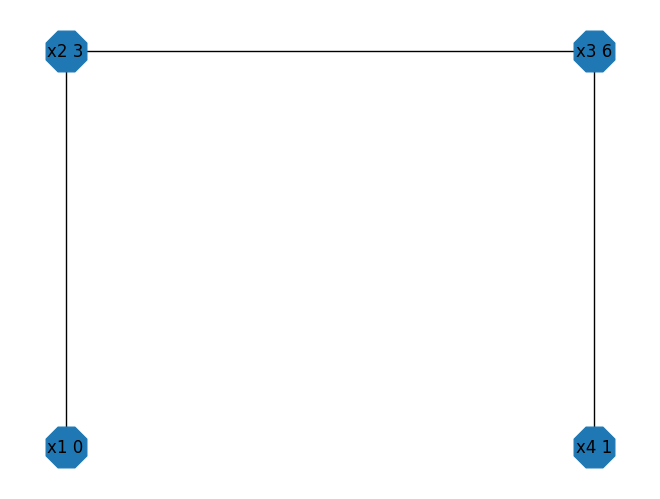

In [ ]:
for key , value in labels.items():
    labels[key]=f'{key} {int(value)}'

pos = {'x1': (0, 0), 'x2': (0, 1), 'x3': (1, 1), 'x4': (1, 0)}
nx.draw(G2 ,pos = pos , labels =labels ,node_shape='8' ,node_size=1000)
plt.show()